In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

summ = pd.read_csv('summary_table_v1.4.csv')
raw = pd.read_csv('drugcomb_data_v1.4.csv')

block_to_study = raw[['block_id', 'study_name']].drop_duplicates()
summ = summ.merge(block_to_study, on='block_id')

mono = summ[summ['drug_col'].isna()]
comb = summ[~summ['drug_col'].isna()]

alm_raw = raw[raw['study_name'] == 'ALMANAC']

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
line = comb[comb['cell_line_name'] == 'HT29']

all_drugs = pd.concat((line['drug_row'], line['drug_col']))

df = pd.DataFrame()
df['drugs'] = all_drugs.unique()

In [5]:
df.to_csv('drugs_in_ht29.csv')

In [6]:
summ[summ['synergy_zip'] > 10]

,block_id,drug_row,drug_col,cell_line_name,conc_r_unit,conc_c_unit,css,synergy_zip,synergy_bliss,synergy_loewe,synergy_hsa,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,S,study_name
4,5,5-FU,AZD1775,A2058,uM,uM,66.8470,12.284698,15.765467,10.409407,18.656340,5.126836,0.266027,11.471,25.164,76.501,57.193,30.2120,ONEIL
6,7,5-FU,AZD1775,A2058,uM,uM,65.5930,14.792935,15.182467,9.826407,18.073340,5.126836,0.266027,11.471,25.164,72.965,58.221,28.9580,ONEIL
24,25,5-FU,ERLOTINIB,A2058,uM,uM,50.6395,11.437784,15.690289,15.893848,18.451300,5.126836,5.000000,11.471,7.953,60.341,40.938,31.2155,ONEIL
38,39,5-FU,LAPATINIB,A2058,uM,uM,39.4540,11.006306,14.724029,13.243399,16.257410,5.126836,1.673086,11.471,3.237,36.283,42.625,24.7460,ONEIL
40,41,5-FU,MK-2206,A2058,uM,uM,51.1035,13.287630,13.554054,14.370355,17.383512,5.126836,4.000000,11.471,11.679,59.794,42.413,27.9535,ONEIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466028,466255,JNK-IN-7,TARIQUIDAR,KB-ChR-8-5-11,uM,uM,-11.9445,28.991995,23.416838,11.309789,9.277967,0.033102,0.018344,-13.704,-2.285,-14.149,-9.740,4.0445,NCATS_MDR_CS
466029,466256,RA-XII,TARIQUIDAR,KB-ChR-8-5-11,uM,uM,12.2270,38.511512,34.275389,24.149251,22.792590,0.005171,0.255526,-10.940,-3.031,31.219,-6.765,26.1980,NCATS_MDR_CS
466030,466257,vinorelbine,TARIQUIDAR,KB-ChR-8-5-11,uM,uM,12.7975,33.448102,27.891554,22.937090,18.687045,0.002872,0.304013,-6.663,-1.943,32.682,-7.087,21.4035,NCATS_MDR_CS
466031,466258,153381-68-1,TARIQUIDAR,KB-ChR-8-5-11,uM,uM,43.5705,46.084903,44.787428,25.947603,30.820681,0.003753,0.087976,-8.699,-8.227,30.885,56.256,60.4965,NCATS_MDR_CS


Text(0.5, 1.0, 'ZIP Scores')

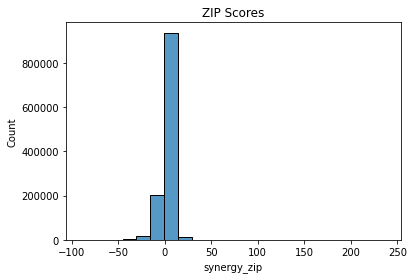

In [10]:
sns.histplot(summ['synergy_zip'])
plt.title('ZIP Scores')

In [8]:
def plot(score_name):
    score = 'synergy_%s' % score_name
    
    df = summ[~summ['drug_col'].isna()]
    if score_name != 'loewe':
        df = df[(df[score] > -50) & (df[score] < 50)]
        
    sns.histplot(df[score])
    plt.title('%s Scores' % score_name.upper())

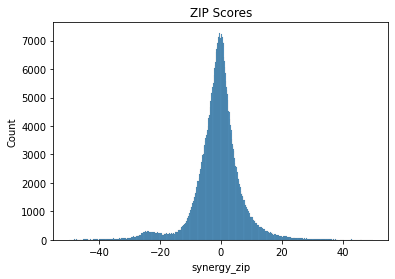

In [9]:
plot('zip')

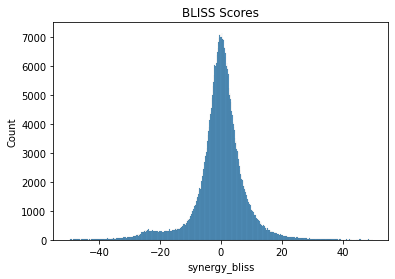

In [10]:
plot('bliss')

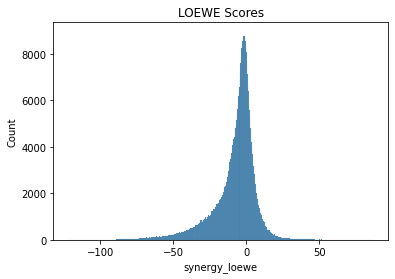

In [11]:
plot('loewe')

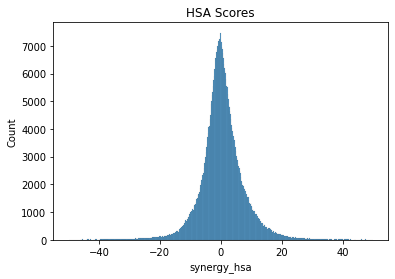

In [12]:
plot('hsa')

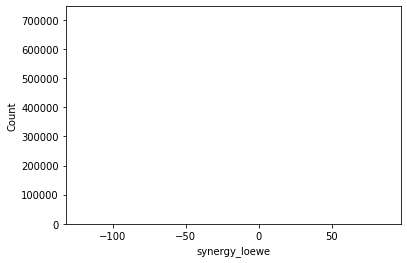

In [30]:
sns.histplot(summ['synergy_loewe'])

In [31]:
summ['synergy_loewe']

0          -2.951386
1           3.125927
2           2.452239
3          -4.062761
4          10.409407
             ...    
1175215     0.000000
1175216     0.000000
1175217     0.000000
1175218     0.000000
1175219     0.000000
Name: synergy_loewe, Length: 1175220, dtype: float64